# Graph Conditional Variational Autoencoder Implementation

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from spektral.layers import GCNConv
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [2]:
def GCAE(input_gfeature_dim, condition_gfeature_dim, condition_feature_dim, latent_dim):
    
    # Define input layers for input and condition
    graph_input = [Input(shape=(input_gfeature_dim[0],)),Input(shape=(input_gfeature_dim[1],))]
    graph_condition = [Input(shape=(condition_gfeature_dim[0],)),Input(shape=(condition_gfeature_dim[1],))]
    dense_condition = Input(shape=(condition_feature_dim,))

    # Apply CGN to achive a vector representation of the data
    # graph_input and graph_condition are the two variable represented by graphs
    input_vector = GCNConv(4, activation='relu')(graph_input)
    condition_vector = GCNConv(8, activation='relu')(graph_condition)

    # Concatenate input and condition
    combined_input = tf.keras.layers.concatenate([condition_vector, dense_condition, input_vector])
    
    # Encoder
    encoded = Dense(64, activation='relu')(combined_input)
    encoded = Dense(32, activation='relu')(encoded)
    encoded = Dense(latent_dim, activation='relu')(encoded)

    # Decoder
    conditional_input = tf.keras.layers.concatenate([condition_vector, dense_condition, encoded])
    
    decoded = Dense(32, activation='relu')(conditional_input)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(input_gfeature_dim[1], activation='sigmoid')(decoded)

    # Create the model
    model = Model(inputs=[graph_input, graph_condition, dense_condition], outputs=decoded)

    return model

In [3]:
input_gfeature_dim, condition_gfeature_dim, condition_feature_dim, latent_dim=[3,10], [3,10], 200, 50

In [4]:
Fitness_GCAE = GCAE(input_gfeature_dim, condition_gfeature_dim, condition_feature_dim, latent_dim)

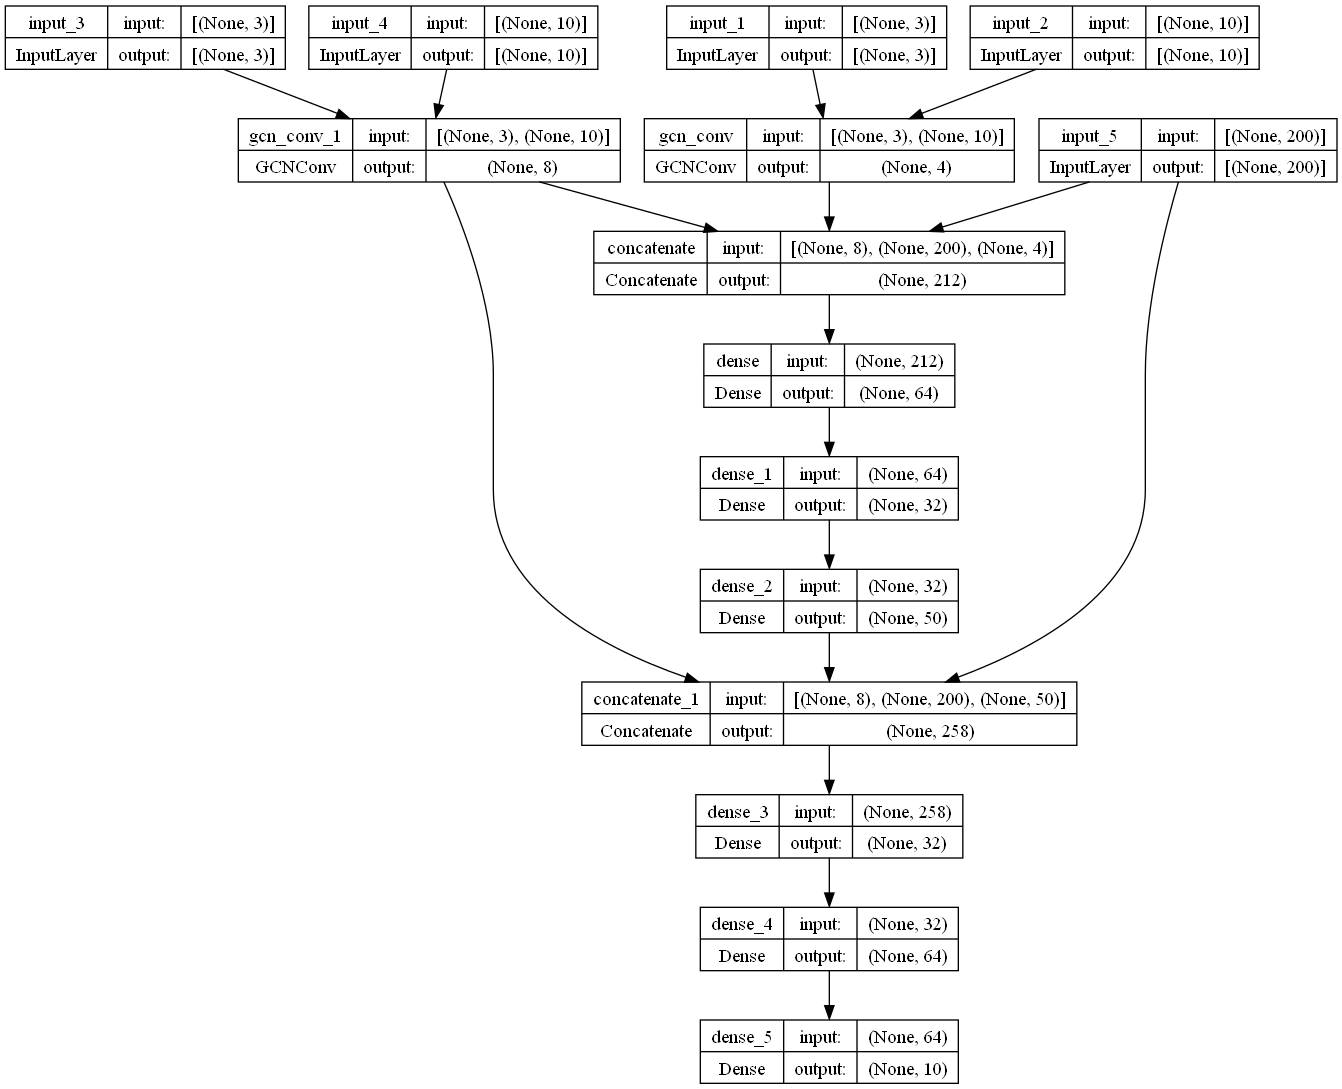

In [5]:
plot_model(Fitness_GCAE, to_file='GCAE.png', show_shapes=True)

In [6]:
def GCVAE(input_gfeature_dim, condition_gfeature_dim, condition_feature_dim, latent_dim):
    
    # Define input layers for input and condition
    graph_input = [Input(shape=(input_gfeature_dim[0],)),Input(shape=(input_gfeature_dim[1],))]
    graph_condition = [Input(shape=(condition_gfeature_dim[0],)),Input(shape=(condition_gfeature_dim[1],))]
    dense_condition = Input(shape=(condition_feature_dim,))

    # Apply CGN to achive a vector representation of the data
    # graph_input and graph_condition are the two variable represented by graphs
    input_vector = GCNConv(4, activation='relu')(graph_input)
    condition_vector = GCNConv(8, activation='relu')(graph_condition)

    # Concatenate input and condition
    combined_input = tf.keras.layers.concatenate([condition_vector, dense_condition, input_vector])
    
    # Encoder
    encoded = Dense(64, activation='relu')(combined_input)
    encoded = Dense(32, activation='relu')(encoded)
    encoded = Dense(latent_dim, activation='relu')(encoded)

    # Variational layer
    z_mean = Dense(latent_dim)(encoded)
    z_log_var = Dense(latent_dim)(encoded)

    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling)([z_mean, z_log_var])

    # Decoder
    conditional_input = tf.keras.layers.concatenate([condition_vector, dense_condition, z])
    
    decoded = Dense(32, activation='relu')(conditional_input)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(input_gfeature_dim[1], activation='sigmoid')(decoded)

    # Create the model
    model = Model(inputs=[graph_input, graph_condition, dense_condition], outputs=decoded)

    return model


In [7]:
Fitness_GCVAE = GCVAE(input_gfeature_dim, condition_gfeature_dim, condition_feature_dim, latent_dim)

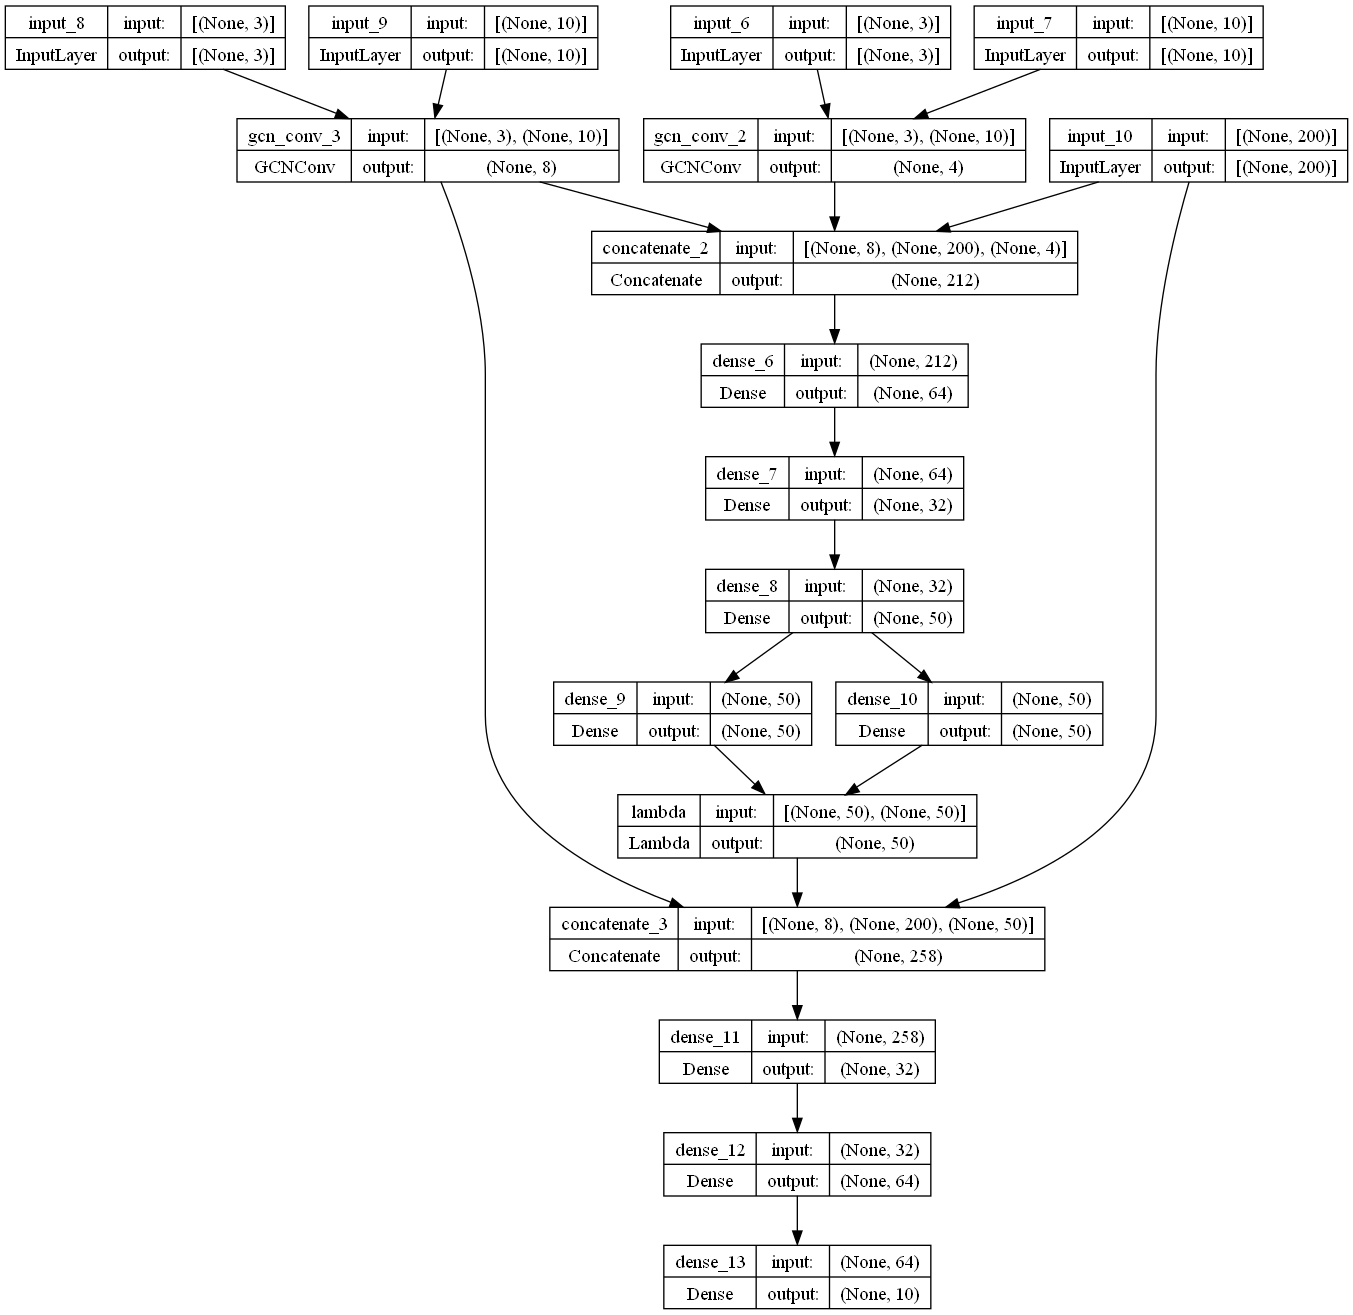

In [8]:
plot_model(Fitness_GCVAE, to_file='GCVAE.png', show_shapes=True)